In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_data = pd.merge(study_results, mouse_metadata, on= 'Mouse ID')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
print(mouse_data['Mouse ID'].nunique())

249


In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_data=mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mouse_id = duplicate_mouse_data.drop_duplicates(subset=["Mouse ID"])
print(duplicate_mouse_id['Mouse ID'])

107    g989
Name: Mouse ID, dtype: object


In [45]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_location = mouse_data.loc[mouse_data["Mouse ID"] == 'g989']
duplicate_mouse_location

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == 'g989'].index)
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_data['Mouse ID'].nunique())

248


## Summary Statistics

In [51]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

mouse_data_byregimen = clean_mouse_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.

drugregimen_mean=mouse_data_byregimen['Tumor Volume (mm3)'].mean()
drugregimen_median=mouse_data_byregimen['Tumor Volume (mm3)'].median()
drugregimen_var=mouse_data_byregimen['Tumor Volume (mm3)'].var()
drugregimen_std=mouse_data_byregimen['Tumor Volume (mm3)'].std()
drugregimen_sem=mouse_data_byregimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drugregimen_tumorstats = { 'Mean Tumor Volume':drugregimen_mean,
                          'Median Tumor Volume':drugregimen_median,
                          'Tumor Volume Variance':drugregimen_var,
                          'Tumor Volume Std. Dev.':drugregimen_std,
                          'Tumor Volume Std. Err.':drugregimen_sem
                         }
tumor_volume=pd.DataFrame(drugregimen_tumorstats)
tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = ['mean','median','var','std','sem']
agg_tumor_volume=clean_mouse_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': summary_stats})

agg_tumor_volume


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

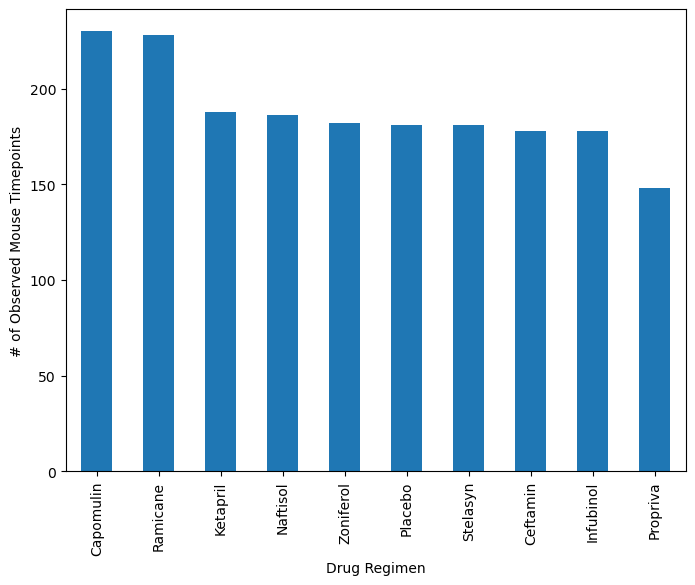

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timpointperdrug=clean_mouse_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
MIDvsTimePct=timpointperdrug.plot(kind='bar', x='Drug Regimen', y='Timepoint',figsize=(8,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

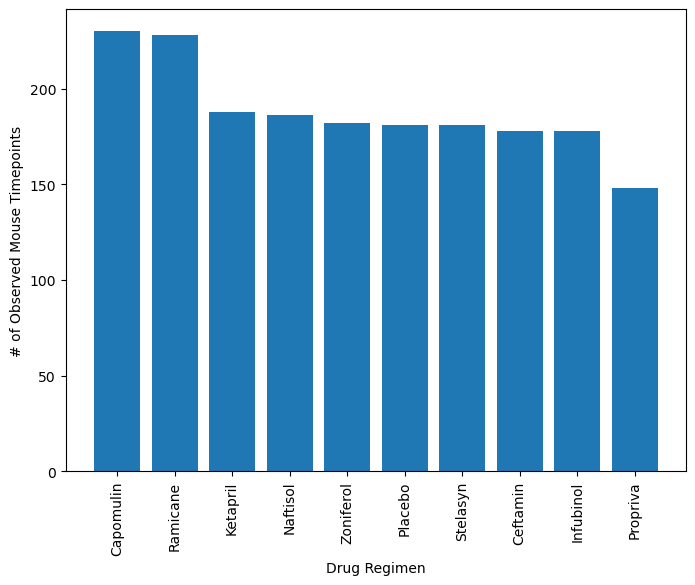

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,6))
plt.bar(x=timpointperdrug.index, height=timpointperdrug.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

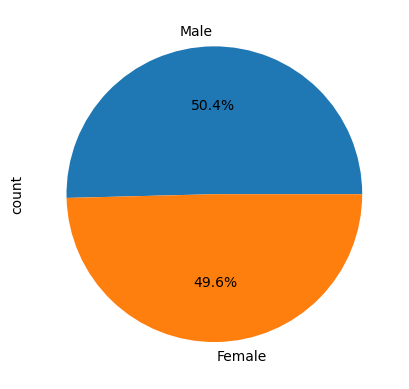

In [81]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mouse_gender=clean_mouse_data[['Mouse ID','Sex']]
mouse_gender_unique=mouse_gender.drop_duplicates(subset='Mouse ID', keep='first')
# Make the pie chart
plot = mouse_gender_unique['Sex'].value_counts().plot(kind  = "pie", y = "Count", labels = ["Male", "Female"], autopct = "%1.1f%%")
plt.show()


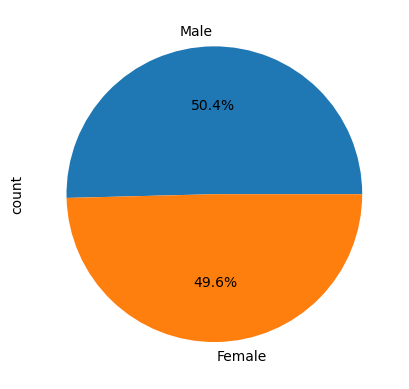

In [85]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

mouse_gender1=clean_mouse_data[['Mouse ID','Sex']]
mouse_gender1_unique=mouse_gender.drop_duplicates(subset='Mouse ID', keep='first')
# Make the pie chart
plt.pie(mouse_gender1_unique["Sex"].value_counts(), labels=["Male","Female"],autopct="%1.1f%%")
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_data_bymouseid=clean_mouse_data.groupby('Mouse ID')
maxtimepoint_index=mouse_data_bymouseid['Timepoint'].idxmax()
maxtimepoint=clean_mouse_data.loc[maxtimepoint_index.reset_index(drop=True)]
maxtimepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1783,a262,45,70.717621,4,Placebo,Female,17,29
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1401,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
499,z435,10,48.710661,0,Propriva,Female,12,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1784,z581,45,62.754451,3,Infubinol,Female,24,25
1887,z795,45,65.741070,3,Naftisol,Female,13,29


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_value=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for regimen in selected_regimens:
    regimen_data=maxtimepoint[maxtimepoint["Drug Regimen"] == regimen]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    tumorvolume_list=regimen_data['Tumor Volume (mm3)'].tolist()
    list_tumor_value.append(tumorvolume_list)

    # Caclculate IQR for list_tumour_values
    quartiles = regimen_data["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    list_potential_outliers = regimen_data.loc[(regimen_data["Tumor Volume (mm3)"] < lower_bound) | 
            (regimen_data["Tumor Volume (mm3)"] > upper_bound), "Tumor Volume (mm3)"]

    #Print results for current regimen
    if len(list_potential_outliers) > 0:
        print(f"{regimen}'s potential outliers: {list_potential_outliers.tolist()} and IQR of {iqr:.2f}.")
    else:
        print(f"{regimen} has no outliers and  IQR of {iqr:.2f}.")

Capomulin has no outliers and  IQR of 7.78.
Ramicane has no outliers and  IQR of 9.10.
Infubinol's potential outliers: [36.3213458] and IQR of 11.48.
Ceftamin has no outliers and  IQR of 15.58.


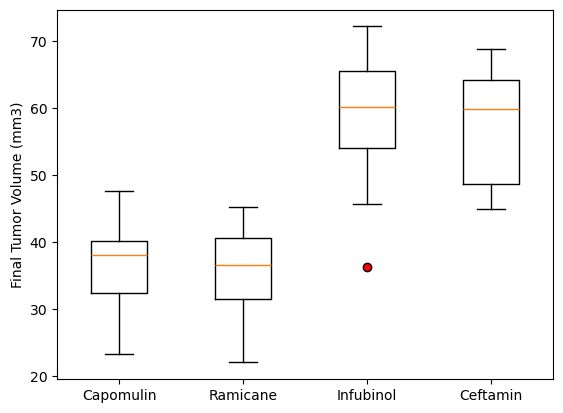

In [101]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

# Create a boxplot using the axis object
ax.boxplot(list_tumor_value,flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Set the x-axis tick labels to be the distinct regimens
ax.set_xticklabels(selected_regimens)

# Show the plot
plt.show()

## Line and Scatter Plots

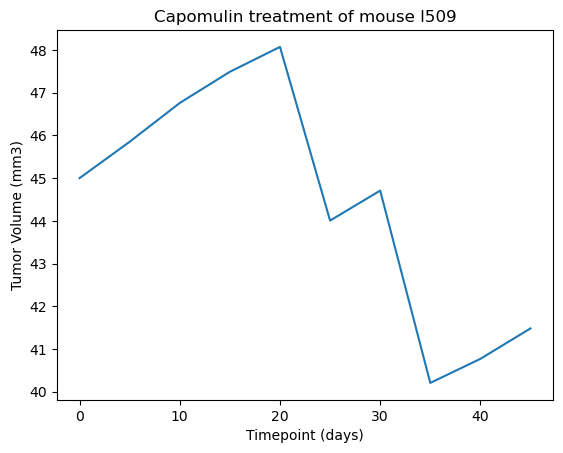

In [115]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = clean_mouse_data[(clean_mouse_data['Drug Regimen'] == "Capomulin") & (clean_mouse_data['Mouse ID'] == "l509")]

# plot the data as a line plot
plt.plot(capomulin["Timepoint"], capomulin["Tumor Volume (mm3)"])

# add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# show the plot
plt.show()

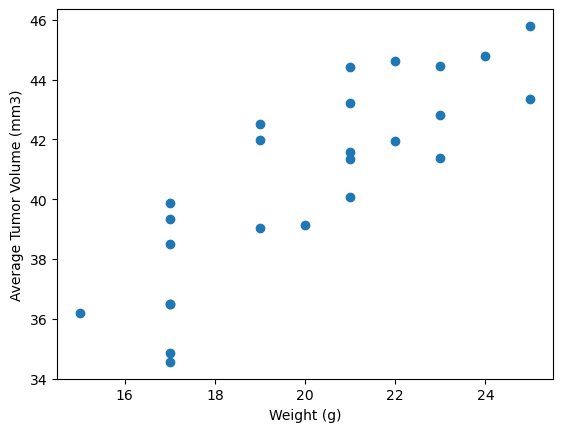

In [121]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for Capomulin regimen
capomulin_regimen = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_regimen.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is: 0.84


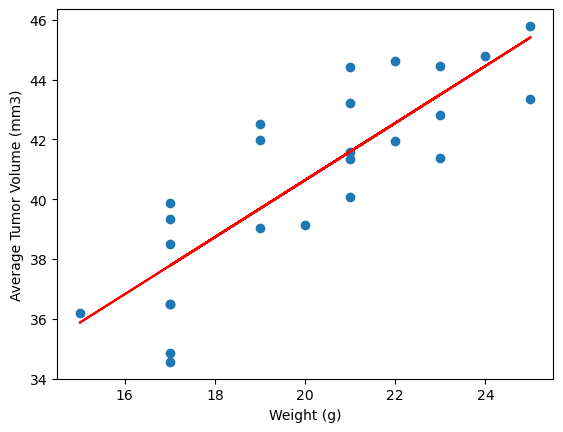

In [123]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for Capomulin regimen
capomulin_regimen = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_regimen.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Calculate regression line
regress_values = grouped_capomulin['Mouse_Weight'] * slope + intercept

# Plot the regression line
plt.plot(grouped_capomulin['Mouse_Weight'], regress_values, color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display correlation coefficient
print(f'The Correlation between mouse weight and the average tumor volume is: {rvalue:.2f}')

# Show the plot
plt.show()